In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def ex2_jacobiana_inv (h, u, lamb, alpha, beta, gamma):
    J = np.array([[1-h*(lamb - alpha*u[1]), h*alpha*u[0]],
                   [-h*beta*u[1], 1-h*(beta*u[0]-gamma)]], dtype='f')
    
    J_inv = np.linalg.inv(J)
    
    return J_inv

In [3]:
def ex2_f_func (u, lamb, alpha, beta, gamma):
    F = np.array([lamb*u[0]-alpha*u[0]*u[1], beta*u[0]*u[1]-gamma*u[1]], dtype='f')
    
    return F

In [4]:
def ex2_g_func (h, uk, uk1, lamb, alpha, beta, gamma):
    F = np.array([lamb*uk1[0]-alpha*uk1[0]*uk1[1], beta*uk1[0]*uk1[1]-gamma*uk1[1]], dtype='f')
    
    Gk1 = uk1-h*F-uk
    
    return Gk1

In [5]:
def ex2_metodo_newton (n, h, uk1_l0, lamb, alpha, beta, gamma):
    
    uk1_l = uk1_l0
    
    for l in range(n):
        J_inv = ex2_jacobiana_inv(h, uk1_l, lamb, alpha, beta, gamma)
        G = ex2_g_func(h, uk1_l0, uk1_l, lamb, alpha, beta, gamma) # se considerarmos uk1_l0 = uk
        
        uk1_l1 = uk1_l - np.dot(J_inv, G)
        uk1_l = uk1_l1
        
    return uk1_l1

In [31]:
def ex2_euler_exp (T0, Tf, n, u0, lamb, alpha, beta, gamma, linspc):
    arr_euler_exp = np.array([u0], dtype='f')
    
    h = (Tf-T0)/n
    
    uk=u0
    
    divisor = int(n/linspc)
    
    if(divisor < 1):
        print('A quantidade de pontos a serem plotados deve ser menor ou igual ao número de passos')
        exit()
    
    for k in range(n):
        uk1 = uk + h*ex2_f_func(uk, lamb, alpha, beta, gamma)
        uk = uk1
        
        if(k%divisor == 0):
            arr_euler_exp = np.vstack([arr_euler_exp, uk])
            
    return arr_euler_exp

In [32]:
def ex2_euler_imp (T0, Tf, n, n_l, u0, lamb, alpha, beta, gamma, linspc):
    arr_euler_imp = np.array([u0], dtype='f')
    
    h = (Tf-T0)/n
        
    uk = u0
        
    divisor = int(n/linspc)
        
    if(divisor < 1):
        print('A quantidade de pontos a serem plotados deve ser menor ou igual ao número de passos')
        exit()        
        
    for k in range(n):
        uk1 = ex2_metodo_newton(n_l, h, uk, lamb, alpha, beta, gamma)
        uk = uk1
        
        if(k%divisor == 0):
            arr_euler_imp = np.vstack([arr_euler_imp, uk])
        
    return arr_euler_imp

In [128]:
def ex2_erro_euler (T0, Tf, n, n_l, u0, lamb, alpha, beta, gamma):
    
    arr_euler_exp = ex2_euler_exp(T0, Tf, n, u0, lamb, alpha, beta, gamma, n)
    arr_euler_imp = ex2_euler_imp(T0, Tf, n, n_l, u0, lamb, alpha, beta, gamma, n)
    
    arr_erro = arr_euler_imp - arr_euler_exp
    
    return arr_erro

In [33]:
def ex2_runge_kuttan4 (T0, Tf, n, u0, lamb, alpha, beta, gamma, linspc):
    
    C1=1/6
    C2=1/3
    C3=1/3
    C4=1/6
    
    arr_rk4 = np.array([u0], dtype='f')
    
    h = (Tf-T0)/n
    passo = np.array([h, h], dtype='f')
    
    ui=u0
    
    divisor = int(n/linspc)
    
    if(divisor < 1):
        print('A quantidade de pontos a serem plotados deve ser menor ou igual ao número de passos')
        exit()     

    for i in range(n):
        K1=ex2_f_func(ui, lamb, alpha, beta, gamma)
        K2=ex2_f_func(ui+passo*K1/2, lamb, alpha, beta, gamma)
        K3=ex2_f_func(ui+passo*K2/2, lamb, alpha, beta, gamma)
        K4=ex2_f_func(ui+passo*K3, lamb, alpha, beta, gamma)
        
        soma = C1*K1 + C2*K2 + C3*K3 + C4*K4
        
        ui1=ui + passo*soma
        ui=ui1
        
        if(i%divisor == 0):
            arr_rk4 = np.vstack([arr_rk4, ui])
        
    return arr_rk4

# Exercício 2

## Dados:
$\lambda{} = \frac{2}{3}$, $\alpha=\frac{4}{3}$, $\beta{} = 1$, $\gamma{}=1$, $x(0)=1.5$, $y(0)=1.5$ e $[T_0, T_f] = [0, 10]$

# 2.1
Escreva um código para resolver (10)-(11) usando o método de Euler explícito. Você deve plotar um
gráfico do retrato de fase. Faça também uma outro gráfico mostrando simultaneamente o tamanho
de cada população ao longo do tempo (plote as raposas em vermelho e os coelhos em azul). Use
um valor n ≥ 5000.

In [100]:
u0 = np.array([1.5, 1.5], dtype='f')

R_exp = ex2_euler_exp(0, 10, 10000, u0, 2/3, 4/3, 1, 1, 1000)

### Pop. raposas x Pop. coelhos

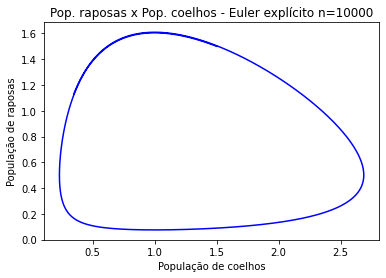

In [114]:
plt.plot(R_exp[:,0], R_exp[:,1], color='blue')
plt.xlabel('População de coelhos')
plt.ylabel('População de raposas')
plt.title('Pop. raposas x Pop. coelhos - Euler explícito n=10000')
plt.show()

### População x Tempo

In [105]:
t = np.arange(0, 10.000000000000001, 10/1000)

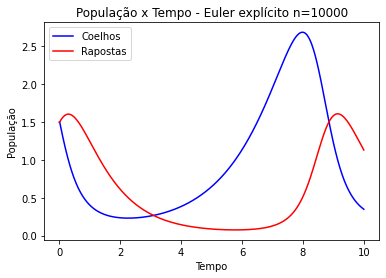

In [115]:
plt.plot(t, R_exp[:,0], color='blue', label='Coelhos')
plt.plot(t, R_exp[:,1], color='red', label='Rapostas')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('População x Tempo - Euler explícito n=10000')
plt.legend()
plt.show()

# 2.2
Escreva um código para resolver (10)-(11) usando o método de Euler implícito. Você deve plotar
um gráfico do retrato de fase. Façaa também uma outro gráfico mostrando simultaneamente o
tamanho de cada populção ao longo do tempo (plote as raposas em vermelho e os coelhos em
azul). Use um valor n ≥ 500.

In [110]:
u0 = np.array([1.5, 1.5], dtype='f')

R_imp = ex2_euler_imp(0, 10, 5000, 7, u0, 2/3, 4/3, 1, 1, 1000)

### Pop. raposas x Pop. coelhos

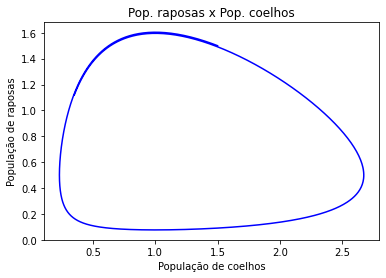

In [111]:
plt.plot(R_imp[:,0], R_imp[:,1], color='blue')
plt.xlabel('População de coelhos')
plt.ylabel('População de raposas')
plt.title('Pop. raposas x Pop. coelhos - Euler implícito n=5000')
plt.show()

### População x Tempo

In [112]:
t = np.arange(0, 10.000000000000001, 10/1000)

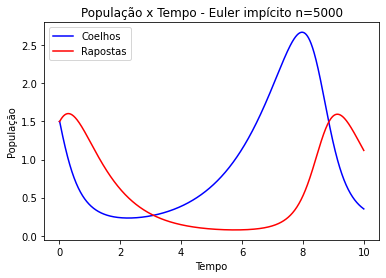

In [118]:
plt.plot(t, R_imp[:,0], color='blue', label='Coelhos')
plt.plot(t, R_imp[:,1], color='red', label='Rapostas')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('População x Tempo - Euler impícito n=5000')
plt.legend()
plt.show()

# 2.3
Sejam $x_{im}(t)$, $y_{im}(t)$ e $x_{ex}(t)$, $y_{ex}(t)$ as soluções usando o método de Euler implícito e explícito,
respectivamente. Vamos definir $E_{x}(t):= x_{im}(t) - x_{ex}(t)$, $E_{y}(t):= y_{im}(t) - y_{ex}(t)$. Para cada valor
n = 250, 500, 1000, 2000, 4000, plote um gráfico com a função $E_{x}(t)$ em azul e a função $E_{y}(t)$ em
vermelho. Comente brevemente o resultado.

In [126]:
u0 = np.array([1.5, 1.5], dtype='f')

## n=250

In [129]:
erro250 = ex2_erro_euler(0, 10, 250, 7, u0, 2/3, 4/3, 1, 1)

In [130]:
t = np.arange(0, 10.0000000001, 10/250)

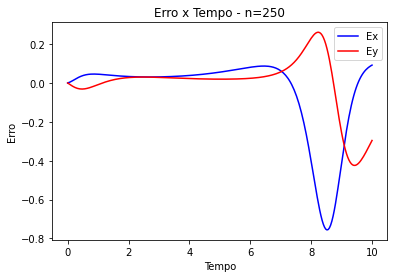

In [131]:
plt.plot(t, erro250[:,0], color='blue', label='Ex')
plt.plot(t, erro250[:,1], color='red', label='Ey')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro x Tempo - n=250')
plt.legend()
plt.show()

## n=500

In [132]:
erro500 = ex2_erro_euler(0, 10, 500, 7, u0, 2/3, 4/3, 1, 1)

In [133]:
t = np.arange(0, 10.0000000001, 10/500)

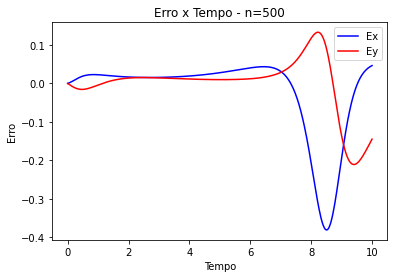

In [134]:
plt.plot(t, erro500[:,0], color='blue', label='Ex')
plt.plot(t, erro500[:,1], color='red', label='Ey')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro x Tempo - n=500')
plt.legend()
plt.show()

## n=1000

In [135]:
erro1000 = ex2_erro_euler(0, 10, 1000, 7, u0, 2/3, 4/3, 1, 1)

In [136]:
t = np.arange(0, 10.0000000001, 10/1000)

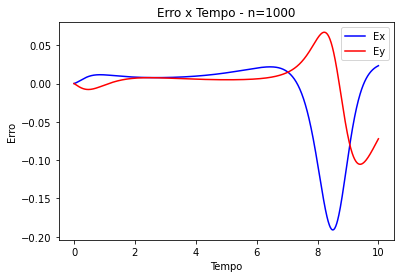

In [137]:
plt.plot(t, erro1000[:,0], color='blue', label='Ex')
plt.plot(t, erro1000[:,1], color='red', label='Ey')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro x Tempo - n=1000')
plt.legend()
plt.show()

## n=2000

In [143]:
erro2000 = ex2_erro_euler(0, 10, 2000, 7, u0, 2/3, 4/3, 1, 1)

In [139]:
t = np.arange(0, 10.0000000001, 10/2000)

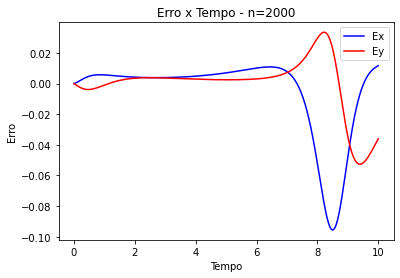

In [140]:
plt.plot(t, erro2000[:,0], color='blue', label='Ex')
plt.plot(t, erro2000[:,1], color='red', label='Ey')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro x Tempo - n=2000')
plt.legend()
plt.show()

## n=4000

In [142]:
erro4000 = ex2_erro_euler(0, 10, 4000, 7, u0, 2/3, 4/3, 1, 1)

In [145]:
t = np.arange(0, 10.0000000001, 10/4000)

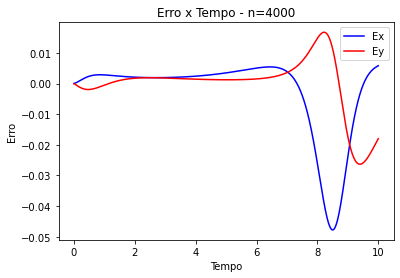

In [146]:
plt.plot(t, erro4000[:,0], color='blue', label='Ex')
plt.plot(t, erro4000[:,1], color='red', label='Ey')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro x Tempo - n=4000')
plt.legend()
plt.show()

# 2.4
Escreva um código para resolver (10)-(11) usando o método de Runge-Kutta 4. Você deve plotar
um gráfico do retrato de fase. Faça também uma outro gráfico mostrando simultaneamente o tamanho de cada população ao longo do tempo (plote as raposas em vermelho e os coelhos em azul). Use um valor n ≥ 500.

In [119]:
u0 = np.array([1.5, 1.5], dtype='f')

R_rk4 = ex2_runge_kuttan4(0, 10, 1000, u0, 2/3, 4/3, 1, 1, 1000)

### Pop. raposas x Pop. coelhos

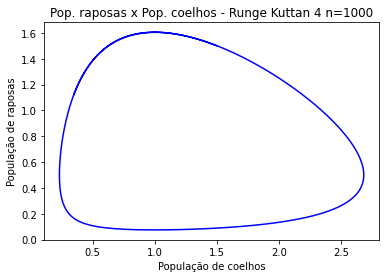

In [120]:
plt.plot(R_rk4[:,0], R_rk4[:,1], color='blue')
plt.xlabel('População de coelhos')
plt.ylabel('População de raposas')
plt.title('Pop. raposas x Pop. coelhos - Runge Kuttan 4 n=1000')
plt.show()

### População x Tempo

In [121]:
t = np.arange(0, 10.000000000000001, 10/1000)

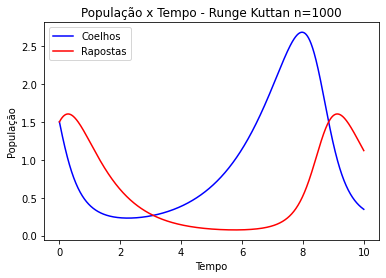

In [122]:
plt.plot(t, R_rk4[:,0], color='blue', label='Coelhos')
plt.plot(t, R_rk4[:,1], color='red', label='Rapostas')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('População x Tempo - Runge Kuttan n=1000')
plt.legend()
plt.show()